In [1]:
%load_ext autoreload
%autoreload 2
import h5py
import hdf5plugin
import correction
import os 
import numpy as np
#Data Files
rootdir = '/data/visitors/balder/20220115/2022022408/raw/XRD Eiger Test'
datafilename = 'LaB6_9_data_000001.h5'
filename = os.path.join(rootdir,datafilename)
data_path = '/entry/data/data'

poni_dir = '/data/visitors/balder/20220115/2022022408/process'
ponifilename = 'samuel_9_0.poni'
ponifile = os.path.join(poni_dir, ponifilename)

icsdfilepath = os.path.join(rootdir,'LaB6-icsd.txt')

#Parameters
pl = 75  # pixel length, in micrometers 
pw = 450 # pixel width, in micrometers
ph = 75  # pixel height, in micrometers
pixel_dimensions = (pl, pw, ph)
with h5py.File(filename,'r') as h5f:
    data = h5f[data_path]
    data = np.squeeze(data)

data = data[0] #extract first stack


bshuf filter already loaded, skip it.


<Figure size 1440x1440 with 0 Axes>

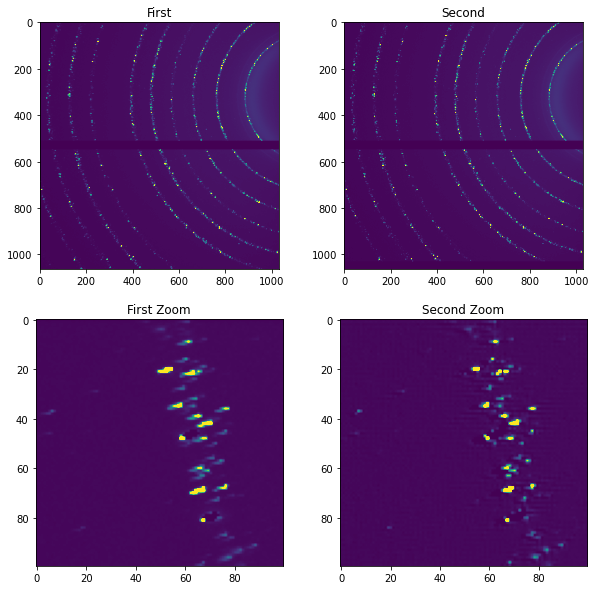

In [2]:
import matplotlib.pyplot as plt

img, mask = correction.mask(data)
poni_dict = correction.load_poni(ponifile)
recovered_img = correction.correct_depth_spill(img, poni_dict, pixel_dimensions)
correction.plot_compare_images(img, recovered_img)

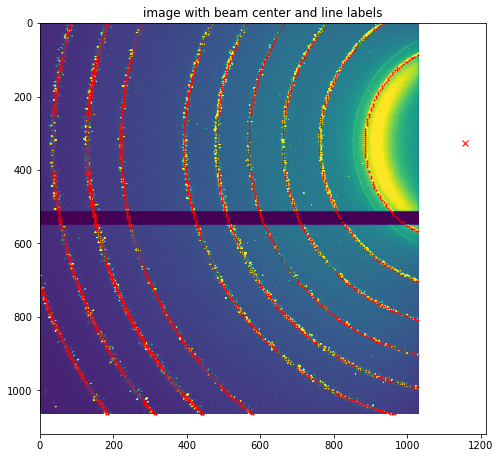

In [3]:
deg_xtth, tth_hkl, det_params_b711 = correction.azimutal_fit(img, poni_dict, icsdfilepath, pixel_dimensions)
az_before = correction.azimutal_integration(img, mask, deg_xtth, tth_hkl, det_params_b711)
az_after = correction.azimutal_integration(img, mask, deg_xtth, tth_hkl, det_params_b711)

correction.plot_fit(img, poni_dict, det_params_b711, tth_hkl, pixel_dimensions)

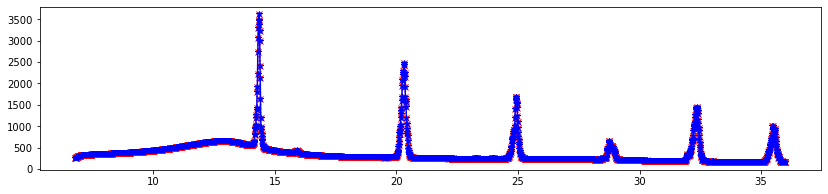

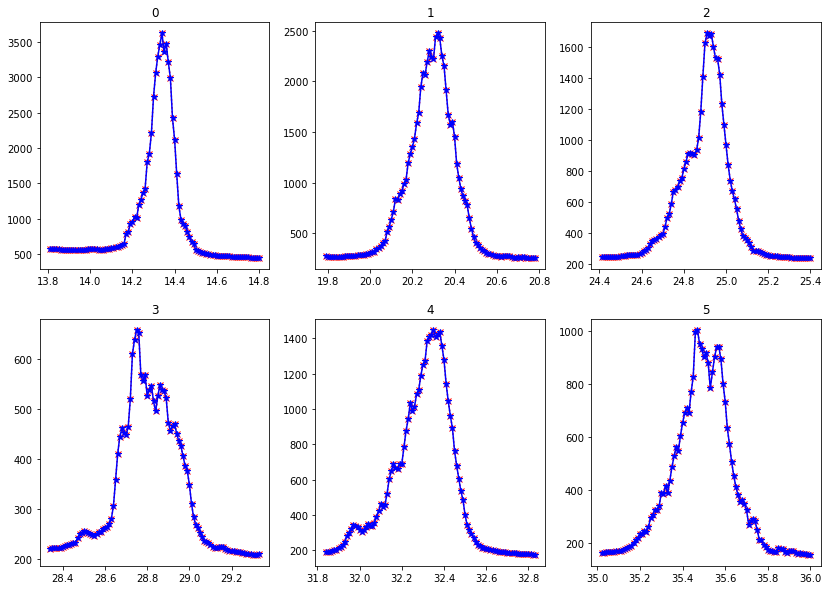

In [4]:
correction.plot_compare_peaks(az_before, az_after, deg_xtth, tth_hkl)

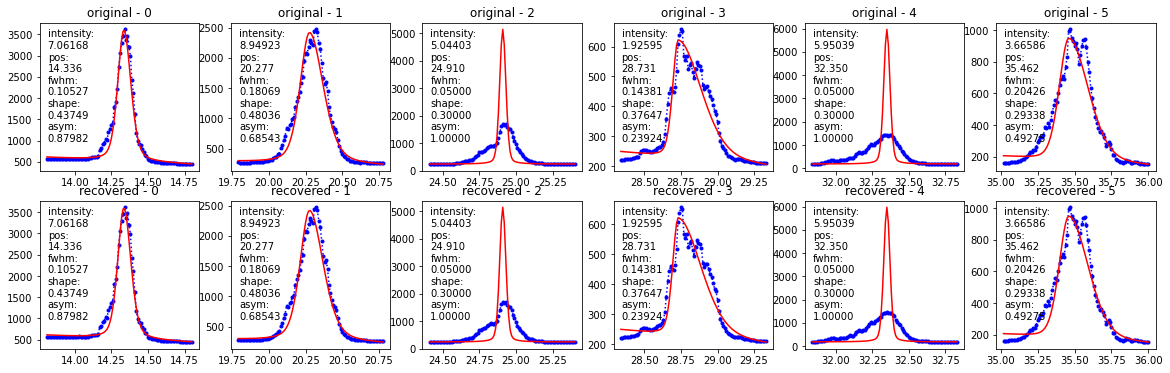

In [5]:
correction.plot_compare_peak_fit(az_before, az_after, deg_xtth, tth_hkl)